<a href="https://colab.research.google.com/github/Rabiah86/EasyVision/blob/main/MainEasyVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


```
EasyVision is an open-source library, targeted to researchers/developers with  no or limited tecnical background in computer vision and deep learninig. 

The library is designed to help users in selcting the best deep network given their image dataset.
The EasyVision library provides the following features:
1- The library performs a set of EDA operations for any image dataset
2- The library runs multiple widely used computer vision deep classifiers
3- Heat maps, loss/accuracy plots, and evaluation metrics are computed for each of the models, and based on that, the best model is recommended
4- The library also supports :
    == Determinism (reproducible NNs)
    == Transfer Learning (both Fine-tune and Freezing layers techniques are supported)
    == Since memory consumption is a mian issue in CV, the library supports 2 modes, Low memory consumption profile (LP) and High memory consumption profile (HP).
    == The library supports labeled image datasets as well as image datasets categorized in directories

Progress:
Development: 90%
```



In [ ]:
from __future__ import print_function, division
from builtins import range, input
import tensorflow as tf
import os
import random
from numpy.random import seed
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.densenet import DenseNet121, preprocess_input
from keras.applications.densenet import DenseNet169, preprocess_input
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.resnet import ResNet101, preprocess_input
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.xception import Xception,preprocess_input, decode_predictions
from keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input
from keras.applications.mobilenet import MobileNet,preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from sklearn.metrics import confusion_matrix,f1_score,precision_recall_curve,plot_precision_recall_curve, classification_report
import numpy as np #adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import pandas as pd #data structures and operations for manipulating numerical tables and time series
import sys # system path io
from glob import glob #glob module is used to retrieve files/pathnames matching a specified pattern
from tqdm import tqdm # show progress bar when a loop is running
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly import tools
from plotly.graph_objs import *
from plotly.graph_objs.layout import Margin, YAxis, XAxis
init_notebook_mode()
from matplotlib import patches as patches
import os
from pathlib import Path
import io
%matplotlib inline 
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import img_to_array, load_img,img_to_array
import tensorflow.keras.backend as K
import cv2
from tensorflow import keras
import collections
from IPython.display import Image
import matplotlib.cm as cm
import seaborn as sns
from collections import Counter
from numpy import log
import math
import pprint
Transfer_learning_weights='imagenet'
sever_imbalance_threshold= .5
moderete_imbalance_threshold = .85
comments=[]
warnings=[]
results = []

In [ ]:
class NoLabelImageClassifier:
  def __init__(
        self,
		    training_images_url,
        test_images_url,
        output_dir='./nolabelresults' ):
        self.output_dir= output_dir
        self.training_images_url= training_images_url
        self.test_images_url= test_images_url
        self.image_files = glob(self.training_images_url + '/*/*.png')
        self.image_files.extend(glob(self.training_images_url + '/*/*.jp*g'))#list of all training image files
        self.valid_image_files = glob(self.test_images_url + '/*/*.png')
        self.valid_image_files.extend(glob(self.test_images_url + '/*/*.jp*g'))
        folders = glob(self.training_images_url + '/*')
        self.NumberOfClasses=len(folders)
  
 
  
  def balance(self,data_sequence):
    import math
    m = len(data_sequence)
    bases = collections.Counter([tmp_base for tmp_base in data_sequence])
 
    shannon_entropy_value = 0
    for base in bases:
        # number of residues
        n_i = bases[base]
        # n_i (# residues type i) / M (# residues in column)
        p_i = n_i / float(m)
        entropy_i = p_i * (math.log(p_i, 2))
        shannon_entropy_value += entropy_i
 
    return (shannon_entropy_value * -1 if shannon_entropy_value != -0 else  1.0)
  def EDA(self):
        #print("training image size")
        #print(self.training_images.shape[1:3])
        #print("test image size")
        #print(self.test_images.shape[1:3])
        test_count = len(self.valid_image_files)
        train_count= len(self.image_files)
        print("Total number of training images: ", train_count)
        print("Total number of test images: ", test_count)
        NumberofTestClasses = len(glob(self.test_images_url + '/*'))
        print("The number of classes in the train set is ",self.NumberOfClasses, 'and the number of test classes is', NumberofTestClasses )
        if NumberofTestClasses == self.NumberOfClasses:
           print("The number of classes in the test and train sets is equal")
           comments.append("The number of classes in the test and train sets is equal")
        else:
           print("Alert: The number of classes in the train and test sets is not equal!! this will raise errors during training")
           warnings.append("The number of classes in the train and test sets is not equal!! this will raise errors during training")
        
         
        fig=plt.figure(figsize=(10, 10))
        plt.title('10 sample images from the dataset', fontsize=14)
        columns =5
        rows = 2        
        m=1    
       
        for i in range(0,10):
            fig.add_subplot(rows, columns,m)
            m=m+1
            plt.imshow(tf.keras.preprocessing.image.load_img(np.random.choice(self.image_files)))
       
        
        
        #EDA 3:Count class instances 

       
        
        folders = ([name for name in os.listdir(self.training_images_url)
            if os.path.isdir(os.path.join(self.training_images_url, name))]) # get all directories 

        class_name=list()
        class_count=list()
        for folder in folders:
            contents = os.listdir(os.path.join(self.training_images_url,folder)) # get list of contents
            class_name.append(folder)
            class_count.append(len(contents))
        #print (np.asarray((unique, counts)).T)
        x = class_name
        y = class_count
        plt.figure(figsize=(10,5))
        sns.barplot(x=x, y=y)
        plt.title('Training set Instance counts', fontsize=14)
        plt.xlabel('Class name', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.show()
        ###########################
        
        Tfolders = ([name for name in os.listdir(self.test_images_url)
            if os.path.isdir(os.path.join(self.test_images_url, name))]) # get all directories 

        test_class_name=list()
        test_class_count=list()
        for tfolder in Tfolders:
            contents = os.listdir(os.path.join(self.test_images_url,tfolder)) # get list of contents
            test_class_name.append(tfolder)
            test_class_count.append(len(contents))
        #print (np.asarray((unique, counts)).T)
        tx = test_class_name
        ty = test_class_count
        plt.figure(figsize=(10,5))
        sns.barplot(x=tx, y=ty)
        plt.title('Test set Instance counts', fontsize=14)
        plt.xlabel('Class name', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.show()
        train_shannon_score=self.balance(class_count)
        print('===================================================================================')
        print('Balance score of training set: (Shannon entropy score) ',str(train_shannon_score))
        if train_shannon_score < sever_imbalance_threshold :
           print("!!!!!!!!!SEVERE IMBALANCE ALERT!!!!!!!!!")
           warnings.append("The train set is severly imbalanced")
        elif train_shannon_score < moderete_imbalance_threshold:
           print("!!!!!!!!!MODERATE IMBALANCE ALERT!!!!!!!!!")
           warnings.append("The training set is moderately imbalanced")
        else:
           print("The training set is balanced")
           comments.append("The training set is balanced")
        print('===================================================================================')
        #print('Balance score of training set: (Shannon entropy score) ',str())
        test_shannon_score=self.balance(test_class_count)
        print('===================================================================================')
        print('Balance score of test set: (Shannon entropy score) ',str(test_shannon_score))
        if test_shannon_score < sever_imbalance_threshold :
           print("!!!!!!!!!SEVERE IMBALANCE ALERT!!!!!!!!!")
           warnings.append("The test set is severly imbalanced")
        elif test_shannon_score < moderete_imbalance_threshold:
           print("!!!!!!!!!MODERATE IMBALANCE ALERT!!!!!!!!!")
           warnings.append("The test set is moderately imbalanced")
        else:
           print("The test set is balanced")
           comments.append("The test set is balanced")
        print('===================================================================================')
        
  def fitClassifier(self, retrain =0, save_flag =0, memory_profile = 0):
        P_epochs = 100
        P_batch_size =8
        #probably need to read the original image size
        
        sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6,min_delta=.001,mode='auto')
        ########################
        IMAGE_SIZE = [200,200]
        gen = ImageDataGenerator(
        rotation_range=20, horizontal_flip=True,  vertical_flip=True, preprocessing_function=preprocess_input)
        valid_gen=ImageDataGenerator(preprocessing_function=preprocess_input)
        test_gen = gen.flow_from_directory(self.test_images_url, target_size=IMAGE_SIZE)
        print(test_gen.class_indices)
        labels = [None] * len(test_gen.class_indices)
        for k, v in test_gen.class_indices.items():
          labels[v] = k
        train_generator = gen.flow_from_directory(
        self.training_images_url,  target_size=IMAGE_SIZE,  batch_size=P_batch_size,  shuffle=True)

        valid_generator = valid_gen.flow_from_directory(
        self.test_images_url,
        target_size=IMAGE_SIZE,
        batch_size=P_batch_size,
        shuffle=True
         )
        
        for model_name in model_list:
            print(model_name)
            IMAGE_SIZE = [200,200]
            layer_index = -1
            reshape_size = -1
            if model_name == "ResNet":
                    
                    layer_index = -7
                    reshape_size = 7
                    if memory_profile == 0:
                       NeuralNetwork = ResNet50(input_shape=IMAGE_SIZE + [3], weights=Transfer_learning_weights, include_top=False)
                       
                    else:
                       NeuralNetwork = ResNet101(input_shape=IMAGE_SIZE + [3], weights=Transfer_learning_weights, include_top=False)

            elif model_name == "VGG":
                    layer_index = -5
                    reshape_size = 12
                    if memory_profile == 0 :
                       NeuralNetwork = VGG16(input_shape=IMAGE_SIZE + [3], weights=Transfer_learning_weights, include_top=False) 
                    else:
                       NeuralNetwork = VGG19(input_shape=IMAGE_SIZE + [3], weights=Transfer_learning_weights, include_top=False) 
                       
            elif model_name == "Densenet":
                    layer_index = -7
                    reshape_size =6
                    if memory_profile == 0:
                       NeuralNetwork = DenseNet121(input_shape=IMAGE_SIZE + [3], weights=Transfer_learning_weights, include_top=False)  
                    else: 
                       NeuralNetwork = DenseNet169(input_shape=IMAGE_SIZE + [3], weights=Transfer_learning_weights, include_top=False)                    
            elif model_name == "Xception":
                    #IMAGE_SIZE = [71,71]
                    layer_index = -13
                    reshape_size =7
                    train_generator = gen.flow_from_directory(
                    self.training_images_url,  target_size=IMAGE_SIZE,  batch_size=P_batch_size,  shuffle=True)

                    valid_generator = valid_gen.flow_from_directory(
                    self.test_images_url,
                    target_size=IMAGE_SIZE,
                    batch_size=P_batch_size,
                    shuffle=True
                     )
                    NeuralNetwork = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
            elif model_name == "MobileNet":
                    if memory_profile == 0 :
                        layer_index = -7
                        reshape_size = 7
                        NeuralNetwork = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 
                    else:
                        layer_index = -11
                        reshape_size = 7
                        NeuralNetwork = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)                                           
            for layer in NeuralNetwork.layers:
                    if not retrain:
                       layer.trainable = False
                    else:
                       layer.trainable = True
            NN_structure= NeuralNetwork.name
            NN_loss= 'categorical_crossentropy' if self.NumberOfClasses >2 else 'binary_crossentropy'
            # layers creation - Here more can be added
            x = Flatten()(NeuralNetwork.output)
            x = Dense(1000, activation='relu')(x) #kernel_initializer=tf.keras.initializers.glorot_uniform(seed=66)
            prediction = Dense(self.NumberOfClasses, activation='sigmoid')(x)
            # creating a model object
            model = Model(inputs=NeuralNetwork.input, outputs=prediction)
            model.compile(loss=NN_loss,
            optimizer='sgd',
            metrics=['accuracy'] )
            #callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6,min_delta=.01,mode='auto')
            model.summary()
            history = model.fit(

              train_generator,

              validation_data=valid_generator,

              epochs=P_epochs,

              steps_per_epoch=len(self.image_files) // P_batch_size,

              validation_steps=len(self.valid_image_files) // P_batch_size
              ,callbacks=[callback])
            acc = history.history['accuracy']
            val_acc = history.history['val_accuracy']
            
            loss = history.history['loss']
            val_loss = history.history['val_loss']
            epochs = range(len(acc))

            plt.plot(epochs, acc, 'r', label='Training accuracy')
            plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
            plt.title('Training and validation accuracy')
            plt.legend(loc=0)
            plt.figure()
            plt.show()
            plt.plot(epochs, loss, 'r', label='Training loss')
            plt.plot(epochs, val_loss, 'b', label='Validation loss')
            plt.title('Training and validation loss')
            plt.legend(loc=0)
            plt.figure()
            plt.show()
            folders = ([name for name in os.listdir(self.training_images_url)
            if os.path.isdir(os.path.join(self.training_images_url, name))]) # get all directories 

            class_name=list()
            class_count=list()
            for folder in folders:
                contents = os.listdir(os.path.join(self.training_images_url,folder)) # get list of contents
                class_name.append(folder)
            test_batches=gen.flow_from_directory(self.test_images_url, target_size=IMAGE_SIZE,classes=class_name,batch_size=P_batch_size, shuffle=True)
            test_labels=test_batches.classes 

            # predict the probability distribution of the data
            predictions=model.predict_generator(test_batches, steps=len(self.valid_image_files) // P_batch_size, verbose=1)

            # get the class with highest probability for each sample
            y_pred = np.argmax(predictions, axis=-1)

            # get the classification report
            print(classification_report(test_labels, y_pred))
            print("f1-Score of the model: ")
            f1 = f1_score(test_labels, y_pred,average='macro')
            print(f1)
            results.append((NN_structure,f1))
            #y_pred = model.predict(pre_test_images, batch_size=P_batch_size, verbose=1)
            #y_pred_bool = np.argmax(y_pred, axis=1)
            #print(classification_report(self.test_labels, y_pred_bool))
            if save_flag:
               model.save(self.output_dir+'/'+model_name+'.h5')
            
            
            for i in range(0,10): 
               #print('hi')
               img= tf.keras.preprocessing.image.load_img(np.random.choice(self.image_files))
               tmp=img
                   
               x = img#image.img_to_array(img)
               x = np.expand_dims(x, axis=0)
               x = preprocess_input(x)
               x= tf.image.resize(x, IMAGE_SIZE, method='nearest')
               preds = model.predict(x)
               #print('hi2')   
               #print(decode_predictions(preds,))
               #layer_names = [layer.name for layer in model.layers[1:]]
               #print(layer_names)
               last_conv_layer = model.get_layer(None, layer_index)
               #print (last_conv_layer)
               #print('hi3') 
    
               with tf.GradientTape() as tape:
                    last_conv_layer = model.get_layer(None, layer_index)#model.get_layer('conv2d_661')
                    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
                    model_out, last_conv_layer = iterate(x)                        
                    class_out = model_out[:, np.argmax(model_out[0])]
                    grads = tape.gradient(class_out, last_conv_layer)
                    pooled_grads = K.mean(grads, axis=(0, 1))
               heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
               heatmap = np.maximum(heatmap, 0)
               heatmap /= np.max(heatmap)
               heatmap = heatmap.reshape((reshape_size, reshape_size))
                   
               #plt.matshow(heatmap)
               #plt.show()
               #img = tf.Variable(img)
               #img = self.training_images[i]#cv2.imread(ORIGINAL)
               INTENSITY = 0.5
               width, height = img.size    
               #print(type(heatmap))               
               heatmap = cv2.resize(heatmap, (width, height))
               #print(type(heatmap))
               #print(type(np.uint8(255*heatmap)))
               
               heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
               img = heatmap * INTENSITY + img
                   
               #img=tf.image.resize(img, [80,80], method= 'bilinear', preserve_aspect_ratio=True,   antialias=True)
                   
               #method='nearest')#method=ResizeMethod.BILINEAR, preserve_aspect_ratio=False,    antialias=False, name=None
               #tmp=tf.image.resize(tmp, IMAGE_SIZE, method= 'bilinear', preserve_aspect_ratio=True,   antialias=True)
               Hori = np.concatenate((tmp, img), axis=1)
               #cv2_imshow(np.array(tmp))           
               #cv2_imshow(np.array(img))
               cv2_imshow(np.array(Hori))
        print("===================================Execution Summary=========================================")
        print("Warnings:")
        if(len(warnings) == 0): 
           print("No warnings")
        else:
           for warning in warnings:
             print(warning)
        
        print("=============================")
        print("Comments")
        if(len(comments) == 0): 
           print("No comments")
        else:
           for comment in comments:
             print(comment)
        print("=============================")
        print("Results summary")
        ResultsDF=pd.DataFrame(results,columns=['Neural Network','F-measure'])
			  #The output format
        from tabulate import tabulate
        print(tabulate(ResultsDF, headers='keys', tablefmt='psql'))
        #max_key = max(results, key=results.get)
        max_key= sorted(results,key=lambda l:l[1], reverse=True)[0]
        print("Based on the results, the following model is recommended")
        print(max_key)
        print("===================================End of Execution Summary=========================================")       
                         

In [ ]:
model_list = [
'ResNet','VGG','Xception','Densenet','MobileNet']
class ImageClassifier:
  def __init__(
        self,
		    training_images, training_labels,
        test_images,test_labels,
        output_dir='./results' ):
        self.output_dir= output_dir
        self.training_images= training_images
        self.training_labels= training_labels
        self.test_images= test_images
        self.test_labels=test_labels
        self.NumberOfClasses=np.unique(self.training_labels).shape[0]
  
  def balance(self,data_sequence):
    import math
    m = len(data_sequence)
    bases = collections.Counter([tmp_base for tmp_base in data_sequence])
  def balance(self,seq):
    
    n = len(seq)
    classes = [(clas,float(count)) for clas,count in Counter(seq).items()]
    k = len(classes)

    H = -sum([ (count/n) * log((count/n)) for clas,count in classes]) #shannon entropy
    return H/log(k)
  def EDA(self):
        print('=========================================EDA==========================================')
        print("training image size", str(self.training_images.shape[1:3]))
        print("test image size",str(self.test_images.shape[1:3]))
        test_count = len(self.test_labels)
        train_count= len(self.training_images)
        print("Total number of training images: ", train_count)
        print("Total number of test images: ", test_count)
        if (len(self.test_images) == test_count) and  (len(self.training_images) == train_count):
            print("All images are annotated")
            comments.append("All images are annotated")
        else:
            print("!!! Some images are not annotated, make sure to annotate all training instances before training the neural network !!!!")
            warnings.append("Some images are not annotated, make sure to annotate all training instances before training the neural network")
        unique1, counts1 = np.unique(self.training_labels, return_counts=True)
        unique, counts = np.unique(self.test_labels, return_counts=True)
        if len(unique) != len(unique1) :
           print("!!!!!!!!!ALERT: the number of classes in the training set doesnt equal the number of classes in the test set!!!!!!!!!")
           warnings.append("The number of classes in the training set doesnt equal the number of classes in the test set")
        else:
           print("The number of classes in the training and test set is equal ")
           comments.append("The number of classes in the training and test set is equal ")
        num_rows, num_cols,elements,depth = self.training_images.shape
        Randomindecies=random.sample(range(1,num_rows), 10)
        fig=plt.figure(figsize=(8, 8))
        plt.title('10 sample images from the dataset', fontsize=14)
        columns =5
        rows = 2
        m=1
        print('===================================================================================')
        for i in Randomindecies: 
            fig.add_subplot(rows, columns,m)
            m=m+1
            plt.imshow(self.training_images[i])
       
        
        #EDA 3:Count class instances 
        print('===================================================================================')
        
        
        #print (np.asarray((unique, counts)).T)
        
        x = unique1
        y = counts1
        plt.figure(figsize=(10,5))
        sns.barplot(x=x, y=y)
        plt.title('Training set Instance counts', fontsize=14)
        plt.xlabel('Class name', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.show()

        #give an indecation if its balanced or not
        #print(flat_training_labels)
        train_shannon_score=self.balance(self.training_labels.flatten())
        print('===================================================================================')
        print('Balance score of training set: (Shannon entropy score) ',str(train_shannon_score))
        if train_shannon_score < sever_imbalance_threshold :
           print("!!!!!!!!!SEVERE IMBALANCE ALERT!!!!!!!!!")
           warnings.append("The training set is severly imbalanced")
        elif train_shannon_score < moderete_imbalance_threshold:
           print("!!!!!!!!!MODERATE IMBALANCE ALERT!!!!!!!!!")
           warnings.append("The training set is moderately imbalanced")
        else:
           print("The training set is balanced")
           comments.append("The training set is balanced")
        print('===================================================================================')
        
        #print (np.asarray((unique, counts)).T)
        x = unique
        y = counts
        plt.figure(figsize=(10,5))
        sns.barplot(x=x, y=y)
        plt.title('Test set Instance counts', fontsize=14)
        plt.xlabel('Class name', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.show()
        test_shannon_score= self.balance(self.test_labels.flatten())
        print('===================================================================================')
        print('Balance score of test set: (Shannon entropy score)',str(test_shannon_score))
        if test_shannon_score < sever_imbalance_threshold :
           print("!!!!!!!!!SEVERE IMBALANCE ALERT!!!!!!!!!")
           warnings.append("The test set is severly imbalanced")
        elif test_shannon_score < moderete_imbalance_threshold:
           print("!!!!!!!!!MODERATE IMBALANCE ALERT!!!!!!!!!")
           warnings.append("The test set is moderately imbalanced")
        else:
           print("The test set is balanced")
           comments.append("The test set is balanced")
        print('===================================================================================')
  def fitClassifier(self, retrain =0, save_flag =0, memory_profile=0):
        P_epochs = 2
        P_batch_size =8
        #probably need to read the original image size
        
        sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,min_delta=.001,mode='auto')
        ########################
        #VGG16 + VGG19 : layer index -5 ,, and the downsample reshape is 12
        #ResNet50,101: index -7, reshape 7x7
        #DenseNet121,a69: index -7, reshape 6
        #MobileNet : -10, rehspae 7......V2 index -7 and reshape 7
        #Xception -13, 7
        for model_name in model_list:
            print(model_name)
            IMAGE_SIZE = [75,75]
            layer_index=-1
            reshape_size=-1
            if model_name == "ResNet":
                    layer_index=-7
                    reshape_size= 3
                                      
                    if memory_profile == 0 :                    
                       NeuralNetwork = ResNet50(input_shape=IMAGE_SIZE + [3], weights=Transfer_learning_weights, include_top=False)
                    else: 
                       NeuralNetwork = ResNet101(input_shape=IMAGE_SIZE + [3], weights=Transfer_learning_weights, include_top=False)
                    pre_training_images = tf.keras.applications.resnet50.preprocess_input(self.training_images)
                    pre_training_images = tf.image.resize(pre_training_images, IMAGE_SIZE, method='nearest')
                    pre_test_images= tf.keras.applications.resnet50.preprocess_input(self.test_images)
                    pre_test_images = tf.image.resize(pre_test_images, IMAGE_SIZE, method='nearest')
            elif model_name == "VGG":
                    layer_index=-5
                    reshape_size= 4
                    pre_training_images= tf.keras.applications.vgg16.preprocess_input(self.training_images)
                    pre_test_images=  tf.keras.applications.vgg16.preprocess_input(self.test_images)
                    pre_training_images = tf.image.resize(pre_training_images, IMAGE_SIZE, method='nearest')
                    pre_test_images = tf.image.resize(pre_test_images, IMAGE_SIZE, method='nearest')
                    if memory_profile == 0 : 
                        NeuralNetwork = VGG16(input_shape=IMAGE_SIZE + [3], weights=Transfer_learning_weights, include_top=False) 
                    else:
                        NeuralNetwork = VGG19(input_shape=IMAGE_SIZE + [3], weights=Transfer_learning_weights, include_top=False) 
            elif model_name == "Densenet":
                    layer_index=-7
                    reshape_size= 2
                    if memory_profile == 0:
                       NeuralNetwork = DenseNet121(input_shape=IMAGE_SIZE + [3], weights=Transfer_learning_weights, include_top=False) 
                    else:
                       NeuralNetwork = DenseNet169(input_shape=IMAGE_SIZE + [3], weights=Transfer_learning_weights, include_top=False)  
                    pre_training_images = tf.keras.applications.densenet.preprocess_input(self.training_images)
                    pre_test_images= tf.keras.applications.densenet.preprocess_input(self.test_images)
                    pre_training_images = tf.image.resize(pre_training_images, IMAGE_SIZE, method='nearest')
                    pre_test_images = tf.image.resize(pre_test_images, IMAGE_SIZE, method='nearest')
            elif model_name == "Xception":
                    #IMAGE_SIZE = [71,71]
                    layer_index= -13
                    reshape_size= 3
                    NeuralNetwork = Xception(input_shape=IMAGE_SIZE + [3], weights=Transfer_learning_weights, include_top=False) 
                    pre_training_images = tf.keras.applications.xception.preprocess_input(self.training_images)
                    pre_test_images= tf.keras.applications.xception.preprocess_input(self.test_images)
                    pre_training_images = tf.image.resize(pre_training_images, IMAGE_SIZE, method='nearest')
                    pre_test_images = tf.image.resize(pre_test_images, IMAGE_SIZE, method='nearest')
            elif model_name == "MobileNet":
                    if memory_profile == 0:
                       layer_index=-7
                       reshape_size= 3
                       NeuralNetwork = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights=Transfer_learning_weights, include_top=False) 
                    else:
                       layer_index=-11
                       reshape_size= 7
                       NeuralNetwork = MobileNet(input_shape=IMAGE_SIZE + [3], weights=Transfer_learning_weights, include_top=False)                        
                    pre_training_images = tf.keras.applications.mobilenet_v2.preprocess_input(self.training_images)
                    pre_test_images= tf.keras.applications.mobilenet_v2.preprocess_input(self.test_images)
                    pre_training_images = tf.image.resize(pre_training_images, IMAGE_SIZE, method='nearest')
                    pre_test_images = tf.image.resize(pre_test_images, IMAGE_SIZE, method='nearest')
            #elif model_name== "EfficientNetB0":
            #        NeuralNetwork = efficientNetB0(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 
            #        pre_training_images = tf.keras.applications.EfficientNetB0.preprocess_input(self.training_images)
            #        prer_test_images= tf.keras.applications.EfficientNetB0.preprocess_input(self.test_images)
                    

                    
            NN_loss= 'sparse_categorical_crossentropy' if self.NumberOfClasses >2 else 'binary_crossentropy'
            #check if the else is needed or not
            for layer in NeuralNetwork.layers:
                    if not retrain:
                       layer.trainable = False
                    else:
                       layer.trainable = True

            NN_structure= NeuralNetwork.name
            # layers creation - Here more can be added
            x = Flatten()(NeuralNetwork.output)
            x = Dense(1000, activation='relu')(x) #kernel_initializer=tf.keras.initializers.glorot_uniform(seed=66)
            prediction = Dense(self.NumberOfClasses, activation='softmax')(x)
            # creating a model object
            model = Model(inputs=NeuralNetwork.input, outputs=prediction)
            model.compile(loss=NN_loss,
            optimizer='sgd',
            metrics=['accuracy'] )
            model.summary()
            history = model.fit(
                  pre_training_images,
                  self.training_labels,
                  epochs=P_epochs, 
                  batch_size=P_batch_size, 
                  verbose=2,
                  
                  validation_data=(pre_test_images,self.test_labels))#callbacks=[callback],
            acc = history.history['accuracy']
            val_acc = history.history['val_accuracy']
            loss = history.history['loss']
            val_loss = history.history['val_loss']
            epochs = range(len(acc))

            plt.plot(epochs, acc, 'r', label='Training accuracy')
            plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
            plt.title('Training and validation accuracy')
            plt.legend(loc=0)
            plt.figure()
            plt.show()
            plt.plot(epochs, loss, 'r', label='Training loss')
            plt.plot(epochs, val_loss, 'b', label='Validation loss')
            plt.title('Training and validation loss')
            plt.legend(loc=0)
            plt.figure()
            plt.show()
            y_pred = model.predict(pre_test_images, batch_size=P_batch_size, verbose=1)
            y_pred_bool = np.argmax(y_pred, axis=1)
            print(classification_report(self.test_labels, y_pred_bool))
            print("f1-Score of the model: ")
            f1 = f1_score(self.test_labels, y_pred_bool,average='macro')
            print(f1)
            results.append((NN_structure,f1))
            if save_flag:
              model.save(self.output_dir+'/'+model_name+'.h5')
            
            #################################################
            
            num_rows, num_cols,elements,depth = self.training_images.shape
            Randomindecies=random.sample(range(1,num_rows), 10)
            #fig=plt.figure(figsize=(8, 8))

            for i in Randomindecies: 
              #fig.add_subplot(rows, columns,m)
              #m=m+1
              #plt.imshow(self.training_images[i])
              img = self.training_images[i]#image.load_img(self.[0], target_size=IMAGE_SIZE)
              img1=tmp=tf.image.resize(img, IMAGE_SIZE, method= 'bilinear', preserve_aspect_ratio=True,   antialias=True)
              
              #cv2_imshow(cv2.imread(self.training_labels[0])) # Visualize image
              x = img#image.img_to_array(img)
              x = np.expand_dims(x, axis=0)
              x = preprocess_input(x)
              x= tf.image.resize(x, IMAGE_SIZE, method='nearest')
              preds = model.predict(x)
              #print(decode_predictions(preds,))
              #layer_names = [layer.name for layer in model.layers[1:]]
              #print('LAYER NAMES')
              #print(layer_names)
              #
              #print('LAST LAYER BEFORE BLOCK')
              last_conv_layer = model.get_layer(None, layer_index)
              #print (last_conv_layer)

              with tf.GradientTape() as tape:
                   last_conv_layer = model.get_layer(None, layer_index)#model.get_layer('conv2d_661')
                   iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
                   model_out, last_conv_layer = iterate(x)
                   class_out = model_out[:, np.argmax(model_out[0])]
                   grads = tape.gradient(class_out, last_conv_layer)
                   pooled_grads = K.mean(grads, axis=(0, 1))
              #print(layer_index)
              #print('Last layer:    '+ str(last_conv_layer))
              heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
              heatmap = np.maximum(heatmap, 0)
              heatmap /= np.max(heatmap)
              heatmap = heatmap.reshape((reshape_size, reshape_size))
              #plt.matshow(heatmap)
              #plt.show()
              #cv2_imshow(heatmapm.numpy())
              img = self.training_images[i]#cv2.imread(ORIGINAL)
              INTENSITY = 0.5
                   
              heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
              #(arr16/256).astype(np.uint8).   
              
              heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
              img = heatmap * INTENSITY + img
              #img=tf.image.resize(img, [80,80], method= 'bilinear', preserve_aspect_ratio=True,   antialias=True)
              #method='nearest')#method=ResizeMethod.BILINEAR, preserve_aspect_ratio=False,    antialias=False, name=None
              img=tmp=tf.image.resize(img, IMAGE_SIZE, method= 'bilinear', preserve_aspect_ratio=True,   antialias=True)
              All_img = np.concatenate((img1, img), axis=1)                 
              cv2_imshow(All_img)
        print("===================================Execution Summary=========================================")
        print("Warnings:")
        if(len(warnings) == 0): 
           print("No warnings")
        else:
           for warning in warnings:
             print(warning)
        
        print("=============================")
        print("Comments")
        if(len(comments) == 0): 
           print("No comments")
        else:
           for comment in comments:
             print(comment)
        print("=============================")
        print("Results summary")
        ResultsDF=pd.DataFrame(results,columns=['Neural Network','F-measure'])
			  #The output format
        from tabulate import tabulate
        print(tabulate(ResultsDF, headers='keys', tablefmt='psql'))
        #max_key = max(results, key=results.get)
        max_key= sorted(results,key=lambda l:l[1], reverse=True)[0]
        print("Based on the results, the following model is recommended")
        print(max_key)
        print("===================================End of Execution Summary=========================================")

        


Save neural networks after training? Y/N  n
The save network option has been deactivated
Fine-tune (retrain) models? Y/N  n
All neural networks will not be retrained!
reproducable models (Dererministic networks) ? Y/N  n
All neural networks will not be dererministic!
Transfer Learning? Imagenet or custom?  imagenet
Low memory consumption profile (L)? High memory consumption (H)?  L
Train on a dataset with a seperate labels file (Op1) ? or images labelled in directories (Op2)?or Quit without training (Q)  1
Display dataset insights? Y/Ny
=========================================EDA==========================================
training image size (32, 32)
test image size (32, 32)
Total number of training images:  50000
Total number of test images:  10000
All images are annotated
The number of classes in the training and test set is equal 


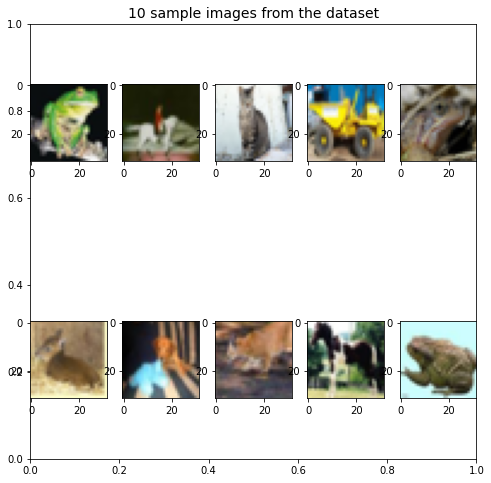

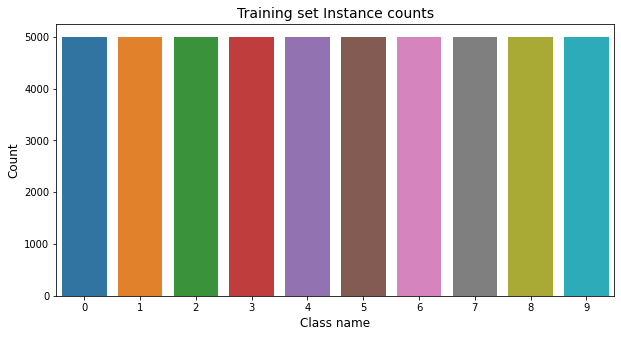

Balance score of training set: (Shannon entropy score)  0.9999999999999998
The training set is balanced


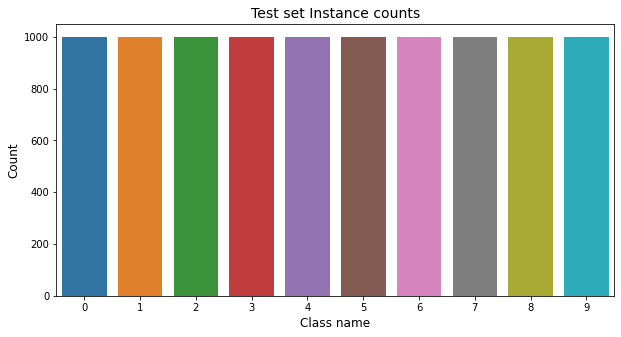

Balance score of test set: (Shannon entropy score) 0.9999999999999998
The test set is balanced
Training will start now, the weight files will NOT be saved the neural networks will be used as feature exractors and all neural networks will NOT be deterministic
ResNet
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 81, 81, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 38, 38, 64)   9472        conv1_pad[0][0]                  
__________________________

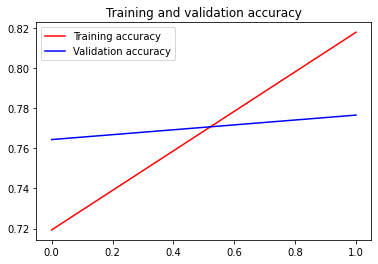

<Figure size 432x288 with 0 Axes>

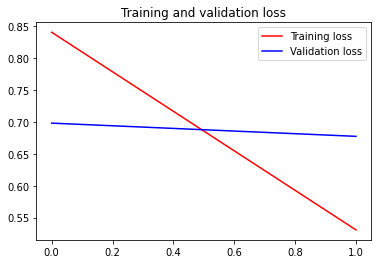

<Figure size 432x288 with 0 Axes>

1250/1250 [==============================] - 13s 10ms/step
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       0.90      0.87      0.88      1000
           2       0.71      0.79      0.75      1000
           3       0.53      0.74      0.61      1000
           4       0.80      0.58      0.67      1000
           5       0.74      0.65      0.69      1000
           6       0.86      0.76      0.81      1000
           7       0.78      0.84      0.81      1000
           8       0.91      0.86      0.88      1000
           9       0.90      0.82      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000

f1-Score of the model: 
0.7786532635655717


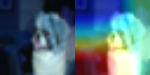

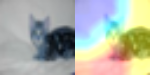

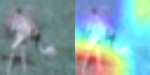

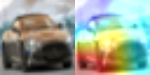

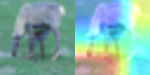

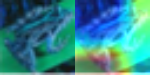

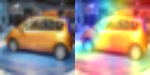

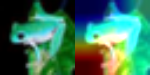

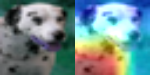

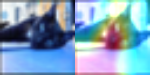

VGG
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)      

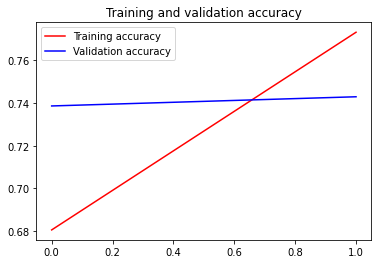

<Figure size 432x288 with 0 Axes>

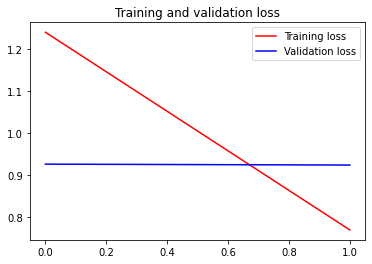

<Figure size 432x288 with 0 Axes>

1250/1250 [==============================] - 8s 7ms/step
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1000
           1       0.83      0.85      0.84      1000
           2       0.76      0.70      0.73      1000
           3       0.53      0.58      0.56      1000
           4       0.66      0.69      0.67      1000
           5       0.68      0.66      0.67      1000
           6       0.80      0.76      0.78      1000
           7       0.67      0.78      0.72      1000
           8       0.85      0.85      0.85      1000
           9       0.90      0.81      0.85      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000

f1-Score of the model: 
0.7442842277253594


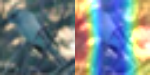

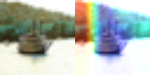

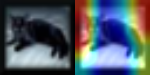

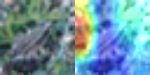

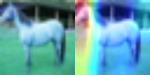

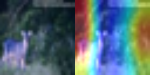

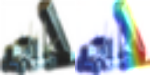

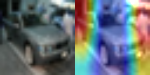

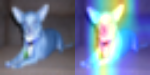

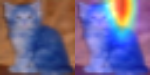

Xception
Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 37, 37, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 37, 37, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 37, 37, 32)   0           block1_conv1_bn[0][0]            
__________________________________________________________________________________

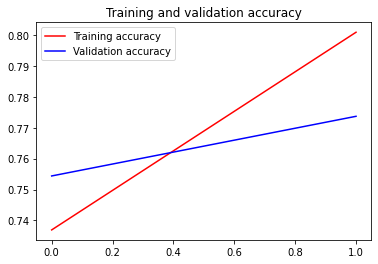

<Figure size 432x288 with 0 Axes>

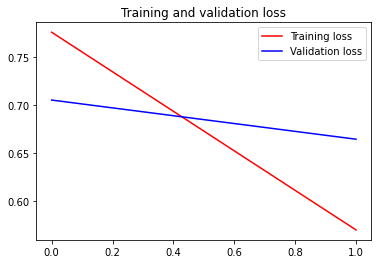

<Figure size 432x288 with 0 Axes>

1250/1250 [==============================] - 11s 8ms/step
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1000
           1       0.87      0.85      0.86      1000
           2       0.81      0.70      0.75      1000
           3       0.58      0.68      0.62      1000
           4       0.75      0.69      0.72      1000
           5       0.69      0.76      0.72      1000
           6       0.75      0.81      0.78      1000
           7       0.85      0.76      0.80      1000
           8       0.93      0.79      0.85      1000
           9       0.78      0.92      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.78     10000
weighted avg       0.78      0.77      0.78     10000

f1-Score of the model: 
0.7751608900184622


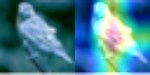

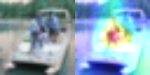

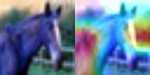

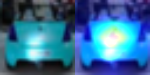

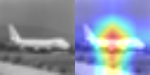

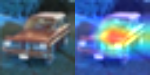

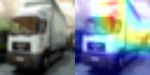

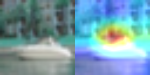

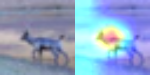

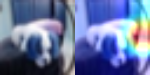

Densenet
Model: "model_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 81, 81, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 38, 38, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 38, 38, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________

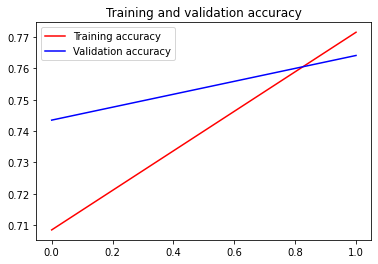

<Figure size 432x288 with 0 Axes>

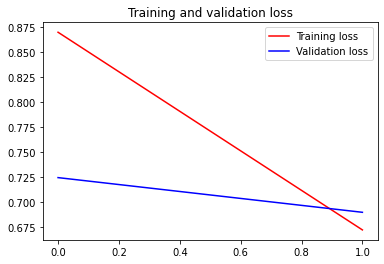

<Figure size 432x288 with 0 Axes>

1250/1250 [==============================] - 16s 12ms/step
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1000
           1       0.88      0.82      0.85      1000
           2       0.78      0.69      0.73      1000
           3       0.65      0.55      0.59      1000
           4       0.70      0.74      0.72      1000
           5       0.70      0.69      0.70      1000
           6       0.82      0.81      0.81      1000
           7       0.71      0.79      0.75      1000
           8       0.80      0.89      0.84      1000
           9       0.81      0.88      0.84      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

f1-Score of the model: 
0.7622086902873567


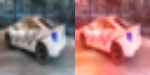

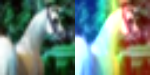

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:292: RuntimeWarning:

invalid value encountered in true_divide



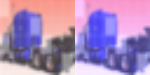

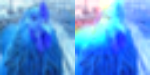

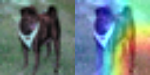

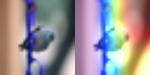

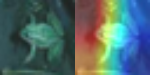

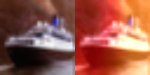

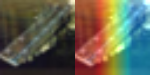

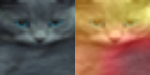

MobileNet
Model: "model_44"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 38, 38, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 38, 38, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 38, 38, 32)   0           bn_Conv1[0][0]                   
_________________________________________________________________________________

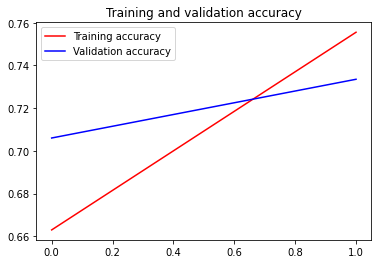

<Figure size 432x288 with 0 Axes>

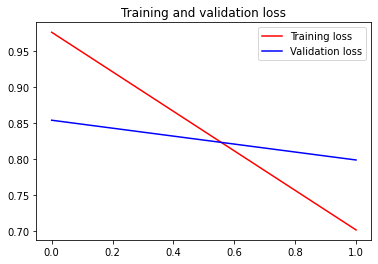

<Figure size 432x288 with 0 Axes>

1250/1250 [==============================] - 7s 5ms/step
              precision    recall  f1-score   support

           0       0.85      0.66      0.74      1000
           1       0.81      0.88      0.85      1000
           2       0.64      0.71      0.67      1000
           3       0.52      0.63      0.57      1000
           4       0.63      0.77      0.69      1000
           5       0.77      0.58      0.66      1000
           6       0.82      0.67      0.74      1000
           7       0.79      0.76      0.78      1000
           8       0.85      0.80      0.82      1000
           9       0.78      0.87      0.82      1000

    accuracy                           0.73     10000
   macro avg       0.75      0.73      0.73     10000
weighted avg       0.75      0.73      0.73     10000

f1-Score of the model: 
0.7346609392118568


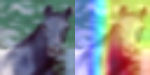

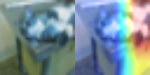

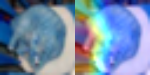

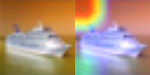

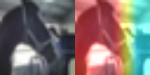

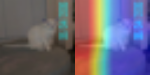

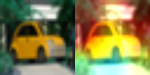

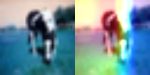

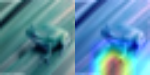

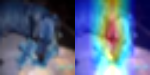

===================================Execution Summary=========================================
Warnings:
No warnings
Comments
All images are annotated
The number of classes in the training and test set is equal 
The training set is balanced
The test set is balanced
Results summary
+----+----------------------+-------------+
|    | Neural Network       |   F-measure |
|----+----------------------+-------------|
|  0 | resnet50             |    0.778653 |
|  1 | vgg16                |    0.744284 |
|  2 | xception             |    0.775161 |
|  3 | densenet121          |    0.762209 |
|  4 | mobilenetv2_1.00_224 |    0.734661 |
+----+----------------------+-------------+
Based on the results, the following model is recommended
('resnet50', 0.7786532635655717)
===================================End of Execution Summary=========================================


In [ ]:
save=0
while True:
      answer2= input("Save neural networks after training? Y/N  ")
      if answer2.upper() =='Y':
         save =1
         break
      elif answer2.upper() == 'N':
         print("The save network option has been deactivated")
         break
      else: 
         print('Invalid answer, please answer Y/N')
retrain=0
while True:
      answer3= input("Fine-tune (retrain) models? Y/N  ")
      if answer3.upper() =='Y':
         retrain = 1
         break
      elif answer3.upper() == 'N':
         print("All neural networks will not be retrained!")
         break
      else: 
         print('Invalid answer, please answer Y/N')
dererministic= 0
while True:
      answer4= input("reproducable models (Dererministic networks) ? Y/N  ")
      if answer4.upper() =='Y':
         dererministic = 1
         PYTHONHASHSEED=0
         s=123
         os.environ['TF_DETERMINISTIC_OPS'] = '1'
         seed(s)
         #from tensorflow import set_random_seed
         tf.random.set_seed(s)
         random.seed(s)
         break
      elif answer4.upper() == 'N':
         print("All neural networks will not be dererministic!")
         break
      else: 
         print('Invalid answer, please answer Y/N')
while True:
      answer6= input("Transfer Learning? Imagenet or custom?  ")
      if answer6.upper() == 'IMAGENET':
         Transfer_learning_weights='imagenet'
         break   
      elif answer6.upper() == 'CUSTOM':
         while True:
               Transfer_learning_weights=input("Please select the pre-trained weights URL")
               path = urlparse.urlparse(url).path
               ext = os.path.splitext(path)[1]
               if ext.upper() == 'H5':
                break  
      else: 
         print('Invalid answer, try again')
memory_profile= 1
while True:
      answer8= input("Low memory consumption profile (L)? High memory consumption (H)?  ")
      if answer8.upper() == 'L':
         memory_profile= 0         
         break   
      elif answer8.upper() == 'H':
         break  
      else: 
         print('Invalid answer, try again')
while True:
      answer5= input("Train on a dataset with a seperate labels file (Op1) ? or images labelled in directories (Op2)?or Quit without training (Q)  ")
      if answer5.upper() =='1':
         cifar10 = tf.keras.datasets.cifar10
         (P_training_images, P_training_labels), (P_test_images, P_test_labels) = cifar10.load_data()
         Vision= ImageClassifier(P_training_images,P_training_labels,P_test_images,P_test_labels)
         while True:
               answer= input("Display dataset insights? Y/N")
               if answer.upper() =='Y':
                  Vision.EDA()
                  break
               elif answer.upper() == 'N':
                  print("The EDA option has been deactivated")
                  break
               else: 
                  print('Invalid answer, please answer Y/N')
         print('===================================================================================')
         print("Training will start now, the weight files will" , 'NOT be saved' if not save else 'be saved', 'the neural networks will','be used as feature exractors' if not retrain  else 'be fine-tuned','and all neural networks will', 'NOT be deterministic' if not dererministic  else 'be deterministic' )      
         print('===================================================================================')
         Vision.fitClassifier(retrain ,save,memory_profile)
         break
      elif answer5.upper() == '2':
         import zipfile
         from tensorflow.keras.preprocessing.image import img_to_array, load_img
         !wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip -O /tmp/horse-or-human.zip
         # Get the Horse or Human Validation dataset
         !wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip -O /tmp/validation-horse-or-human.zip 
         local_zip = '//tmp/horse-or-human.zip'
         zip_ref = zipfile.ZipFile(local_zip, 'r')
         zip_ref.extractall('content/tmp/training')    
         zip_ref.close()

         local_zip = '//tmp/validation-horse-or-human.zip'
         zip_ref = zipfile.ZipFile(local_zip, 'r')
         zip_ref.extractall('content/tmp/validation')
         zip_ref.close()

         train_dir='content/tmp/training'
         validation_dir = 'content/tmp/validation'
         import os
         path = train_dir

         graduateoneday= NoLabelImageClassifier(train_dir,validation_dir)
         while True:
               answer= input("Display dataset insights? Y/N  ")
               if answer.upper() =='Y':
                  graduateoneday.EDA()
                  break
               elif answer.upper() == 'N':
                  print("The EDA option has been deactivated")
                  break
               else: 
                  print('Invalid answer, please answer Y/N')
         
         graduateoneday.fitClassifier(retrain, save, memory_profile)
         break
      elif answer5.upper() == 'Q':
         breaknn
      else: 
         print(answer5)
         print('Invalid answer, please answer Y/N')


TO DO
-pix probably need to be color tuned?
-map class index to name
- test features like determinism + save files 
=====================
can define a list of warnings and a list of results to sum up at the end :)
5- keep hyper tuning in mind (KEEP CURRENT IMAGE size or sometimes its too much for memory? 
11- add the evaluation and recommendation module 
13- does bringing xception to the front cause errors?